# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import cross_val_score

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы при повторном прогоне экспериментов результаты эксперимента не менялись.")

Чтобы при повторном прогоне экспериментов результаты эксперимента не менялись.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


In [6]:
df_train.tail(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6990,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6991,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [10]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [12]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски имеются и в тестовой, и в тренировочной части в столбцах:

mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [13]:
y = df_train['selling_price']
df_train = df_train.drop('selling_price', axis=1)

In [14]:
df_train.duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [15]:
df_train.loc[df_train.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [16]:
df_train = df_train.drop_duplicates(keep = 'first')
df_train.insert(loc= 2 , column='selling_price', value=y)

In [17]:
assert df_train.shape == (5840, 13)

In [18]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [19]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [20]:
import re
def handle_torque(x: str):
    ''' На вход принимает строку параметра крутящий момент
    с единицами измерения. Переводит разные единицы измерения,
    отдает округленное значение параметра без единиц измерения, в формате float. '''

    if not pd.notnull(x):
        return None, None

    xm = re.sub(r'at', '@', x.replace(' ', ''))
    xm = re.sub(r'\d+-|~', '', xm)
    xm = re.sub(r',', '', xm)
    xm = xm.lower()

    torque_units = re.search(r'((?<=\(|\d)[a-z]+(?=@))', xm)
    torque_units = torque_units.group() if torque_units else 'nm'
    torque_to_nm = 1 if torque_units == 'nm' else 9.8067

    values = list(map(float, re.findall(r'[0-9]+\.*[0-9]*', xm)))

    if len(values) == 2:
        torque, rpm = values
        return (round(torque * torque_to_nm, 1), rpm)

    elif len(values) == 1:
        if values[0] < 1000:
            torque, rpm = values[0], None
            return (round(torque * torque_to_nm, 1), rpm)
        else:
            torque, rpm = None, values[0]
            return (torque, rpm)
    elif len(values) == 0:
        return None, None

In [21]:
def get_value(x: str):
    '''Фильрует все не-числовые значения'''
    if not pd.notnull(x):
        return None
    value = re.search(r'\d+.\d+|\d+', x)
    if not value:
        return None
    return float(value.group())

In [22]:
# Удаляем единицы измерения
df_train["mileage"] = df_train["mileage"].apply(get_value).astype('float64')
df_train["engine"] = df_train["engine"].apply(get_value).astype('float64')
df_train["max_power"] = df_train["max_power"].apply(get_value).astype('float64')
df_train[["torque", "max_torque_rpm"]] = pd.DataFrame(df_train["torque"].apply(handle_torque).to_list())

In [23]:
df_test["mileage"] = df_test["mileage"].apply(get_value).astype('float64')
df_test["engine"] = df_test["engine"].apply(get_value).astype('float64')
df_test["max_power"] = df_test["max_power"].apply(get_value).astype('float64')
df_test[["torque", "max_torque_rpm"]] = pd.DataFrame(df_test["torque"].apply(handle_torque).to_list())

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  torque          5642 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5639 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          977 non-null    float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  973 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [26]:
df_train['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_train['engine'].fillna(df_train['engine'].median(), inplace=True)
df_train['max_power'].fillna(df_train['max_power'].median(), inplace=True)
df_train['seats'].fillna(df_train['seats'].median(), inplace=True)
df_train['torque'].fillna(df_train['torque'].median(), inplace=True)
df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median(), inplace=True)

df_test['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_test['engine'].fillna(df_train['engine'].median(), inplace=True)
df_test['max_power'].fillna(df_train['max_power'].median(), inplace=True)
df_test['seats'].fillna(df_train['seats'].median(), inplace=True)
df_test['torque'].fillna(df_train['torque'].median(), inplace=True)
df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median(), inplace=True)

In [27]:
df_train.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [28]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   float64
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


In [31]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.7,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.8,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.8,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.0,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.4,5.0,12750.0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [32]:
df_train['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [33]:
print("Потому что у параметра seats всего несколько возможных значений (он дискретный)"
      "\nкоторые больше отображают размер автомобиля и его пассажировместимость,"
      "\nчем какие-либо технические характеристики. Этим он напоминает категориальную переменную.")

Потому что у параметра seats всего несколько возможных значений (он дискретный)
которые больше отображают размер автомобиля и его пассажировместимость,
чем какие-либо технические характеристики. Этим он напоминает категориальную переменную.


In [34]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

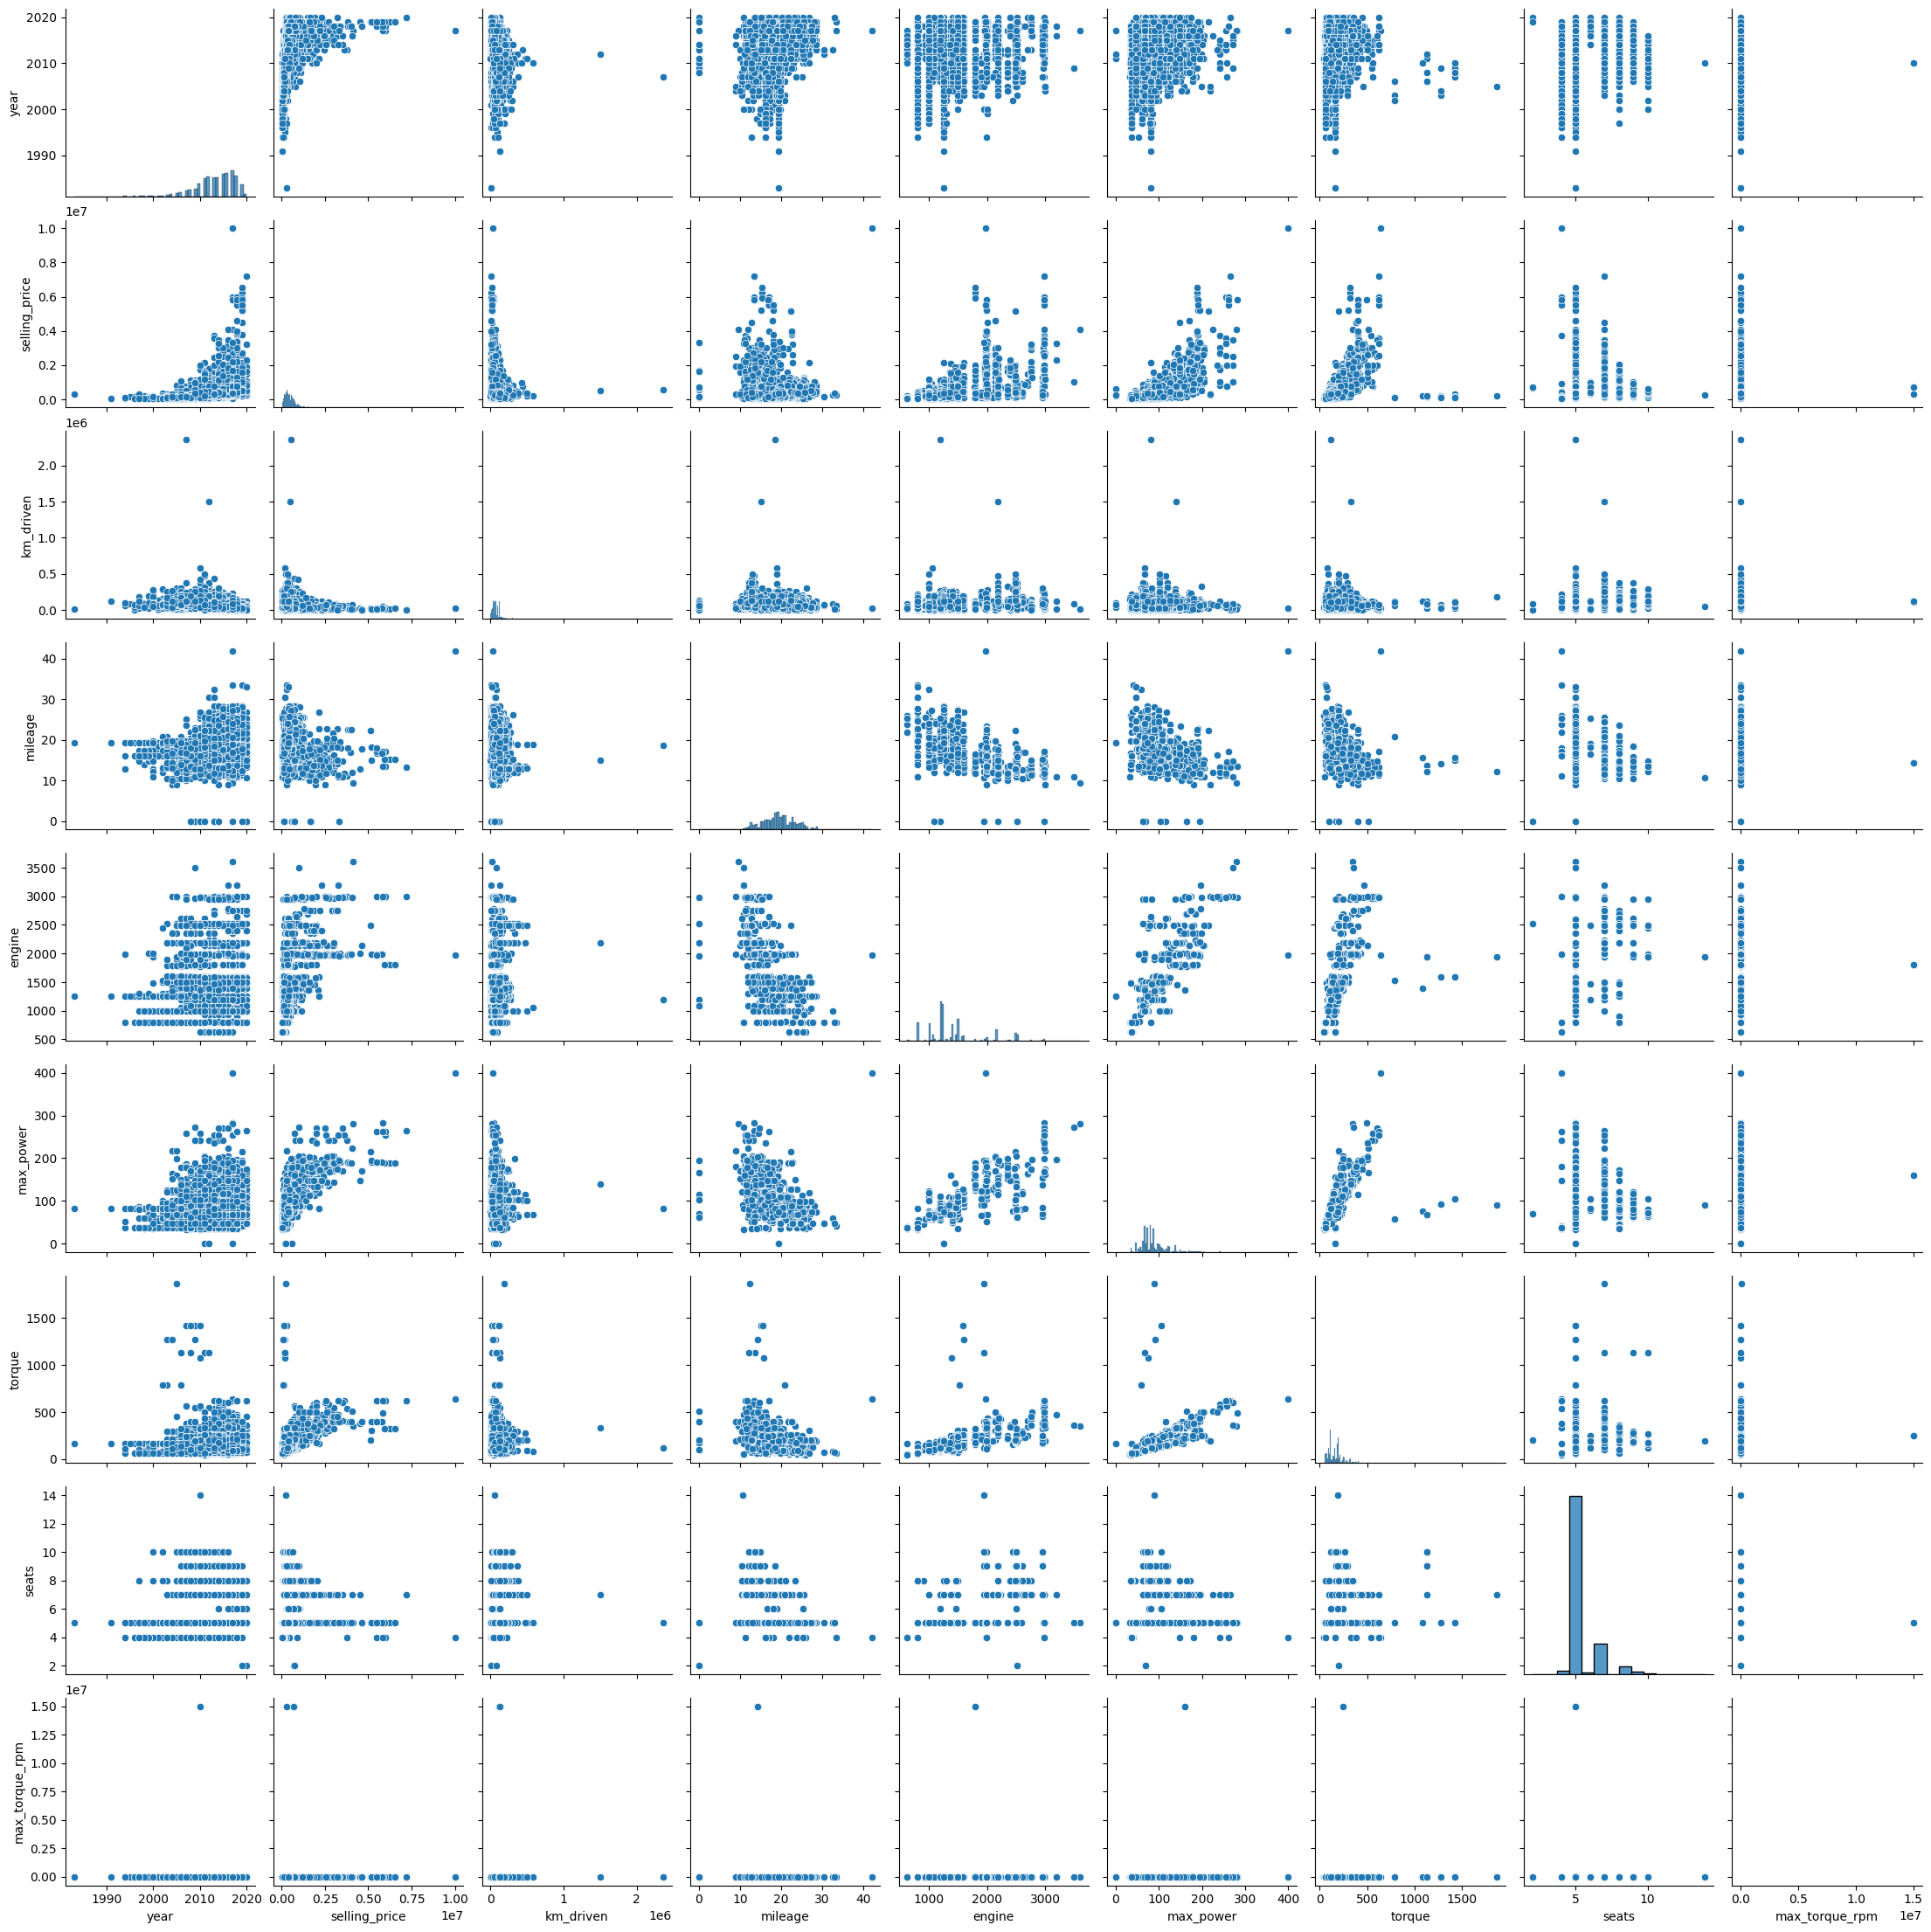

In [35]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Ответы на вопросы:

- Судя по графикам, признаки year и engine имеют линейную зависимость с целевой переменной.
Зависиость между признаками year и целевой переменной выглядит квадратичной

- Признаки engine, torque и seats сильно связаны, есть связь между признаком year и признаками mileage, km_driven, max power. Связаны также engine и torque (это довольно очевидно :)).

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

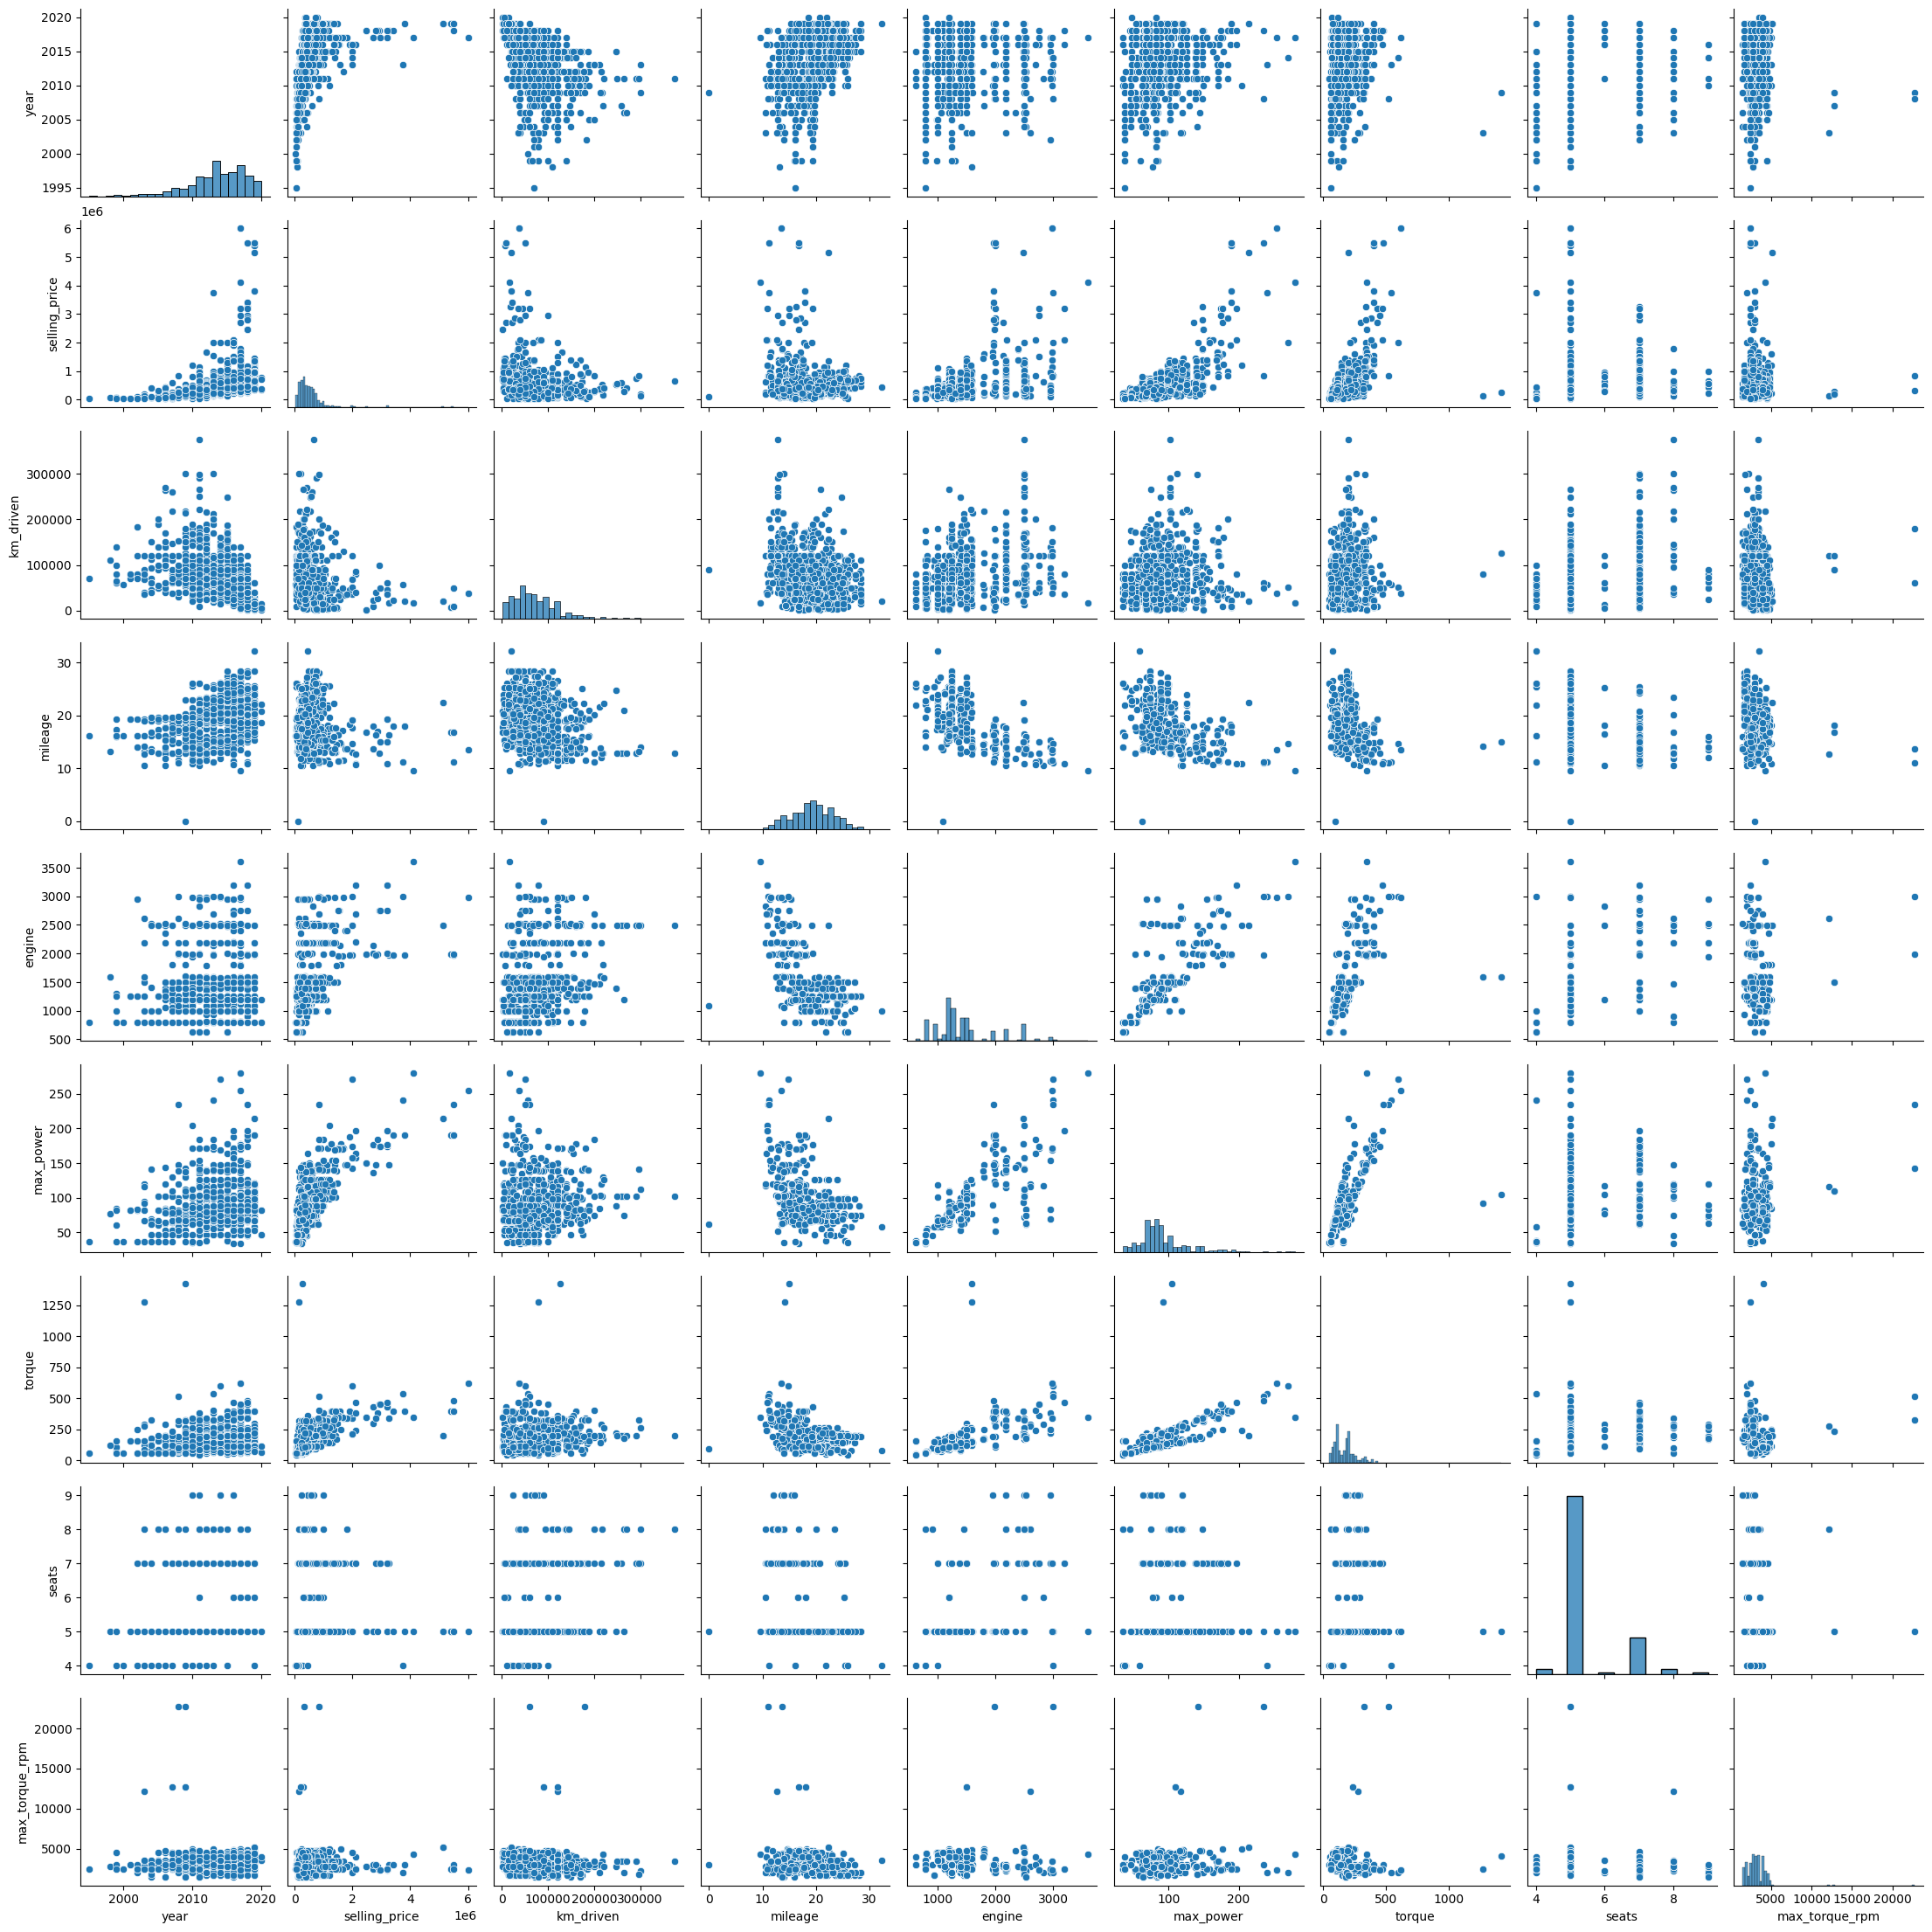

In [36]:
sns.pairplot(df_test)

In [37]:
print("Да, похожи, но есть и небольшие отличия в гистограммах распределения признаков, например, у признака mileage")

Да, похожи, но есть и небольшие отличия в гистограммах распределения признаков, например, у признака mileage


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<ipython-input-38-a1f7e28e5d82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


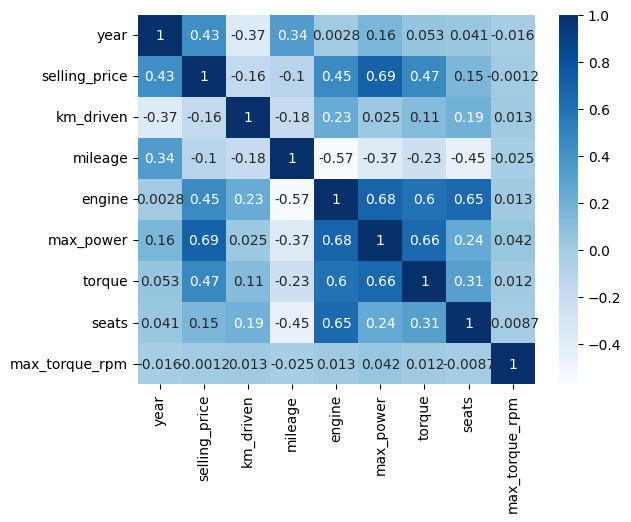

In [38]:
corr = df_train.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

 Ответы:
 - selling_price и max_torque_rpm
 - selling_price и max_power, engine и max_power, engine и seats
 - Да, между признаками year и km_driven видна отрицательная зависимость

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

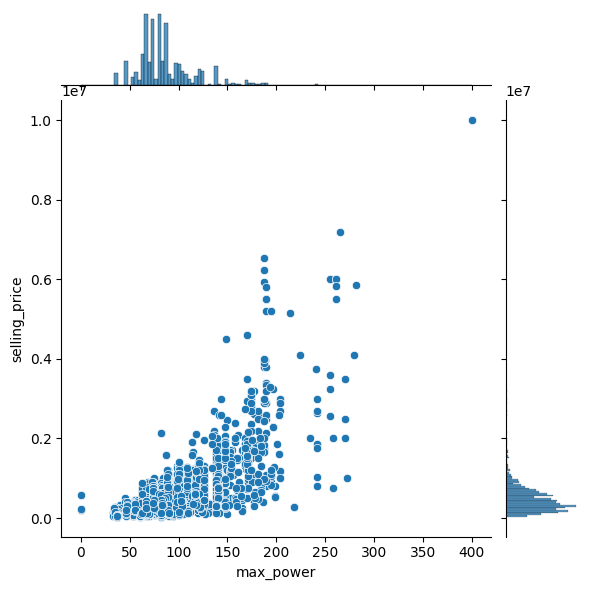

In [39]:
sns.jointplot(x = df_train['max_power'], y = df_train['selling_price'], kind = 'scatter')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

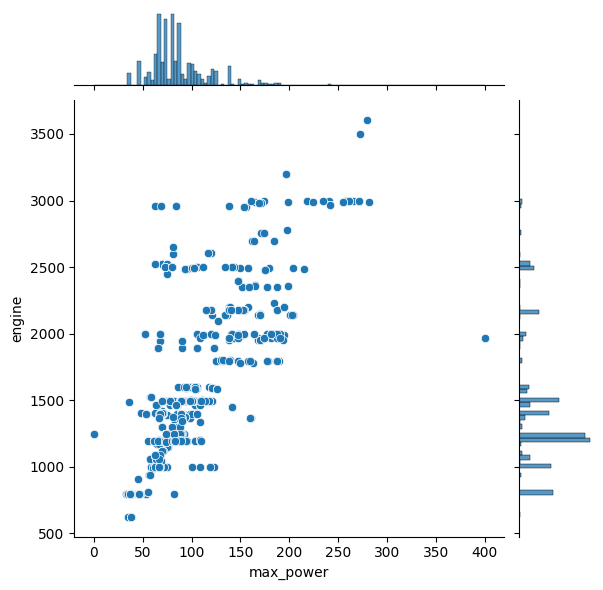

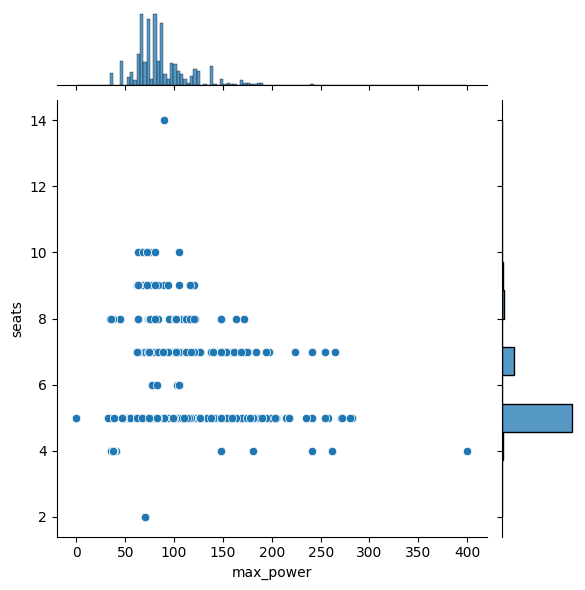

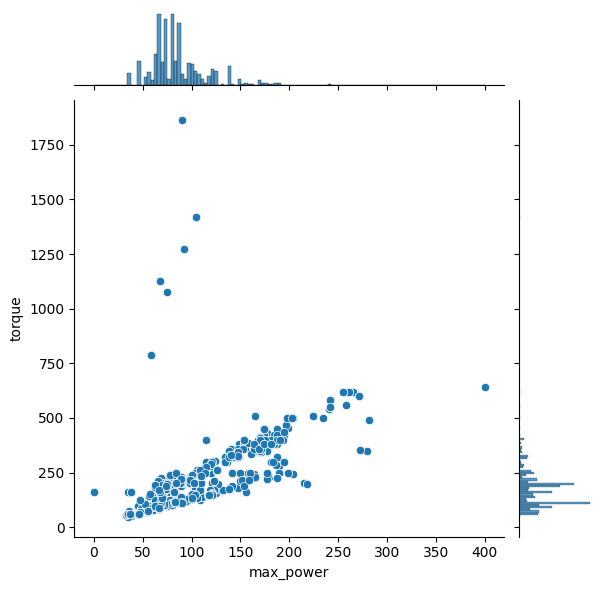

In [40]:
# Посмотрим на наиболее положительно зависимые признаки
sns.jointplot(x = df_train['max_power'], y = df_train['engine'], kind = 'scatter')
sns.jointplot(x = df_train['max_power'], y = df_train['seats'], kind = 'scatter')
sns.jointplot(x = df_train['max_power'], y = df_train['torque'], kind = 'scatter')

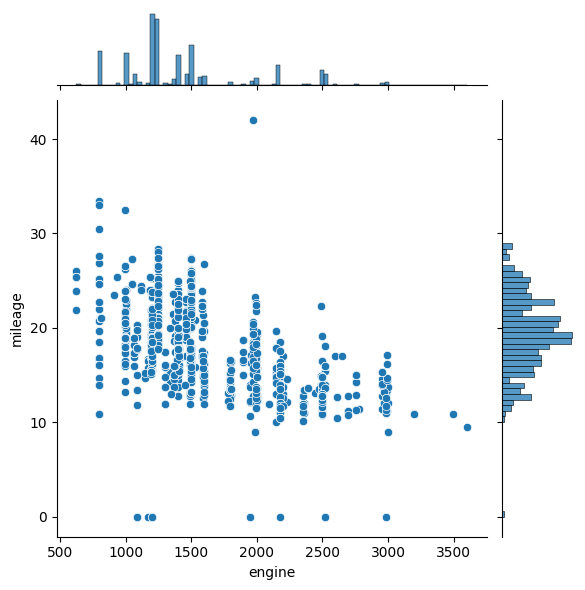

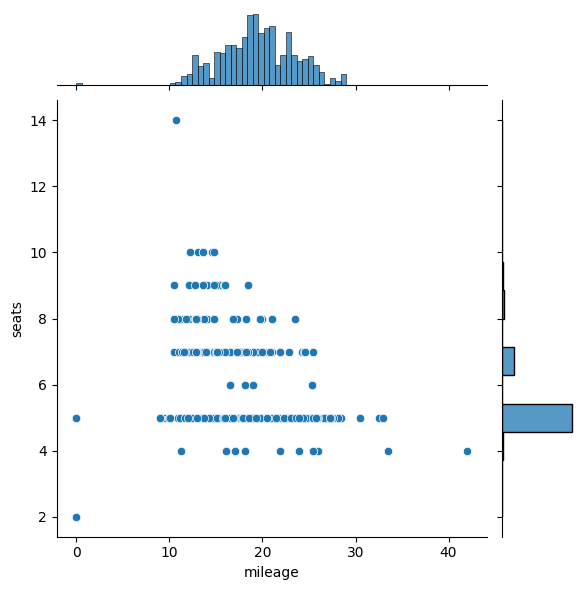

In [41]:
# Посмотрим на наиболее отрицательно зависимые признаки
sns.jointplot(x = df_train['engine'], y = df_train['mileage'], kind = 'scatter')
sns.jointplot(x = df_train['mileage'], y = df_train['seats'], kind = 'scatter')

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [42]:
y_train = df_train['selling_price']
mod_train = df_train.copy()
mod_train = mod_train.select_dtypes(include='number')
mod_train = mod_train.drop('selling_price', axis=1)
X_train = mod_train

In [43]:
assert X_train.shape == (5840, 8)

In [44]:
y_test = df_test['selling_price']
mod_test = df_test.copy()
mod_test = mod_test.select_dtypes(include='number')
mod_test = mod_test.drop('selling_price', axis=1)
X_test = mod_test

In [45]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_pred)}")
print("*"*20)
score = cross_val_score(model, X_train, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  116487192746.16113
Значение R^2 для трейна:  0.5936091682169908
********************
Значение MSE для теста:  232795188932.2784
Значение R^2 для теста:  0.595018050775644
********************

Результат кросс-валидации: [0.56241778 0.59084186 0.64761785 0.5840075  0.42535606 0.66214079
 0.47387548 0.62734418 0.54757019 0.56897138]

Среднее кросс-валидации: 0.56901


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model_sc = LinearRegression()
model_sc.fit(X_train_std, y_train)

train_pred_std = model_sc.predict(X_train_std)
test_pred_std = model_sc.predict(X_test_std)

print("*"*20)
print(f"Значение MSE для стандартизированного трейна:  {MSE(y_train, train_pred_std)}")
print(f"Значение R^2 для стандартизированного трейна:  {r2_score(y_train, train_pred_std)}")
print("*"*20)
print(f"Значение MSE для стандартизированного теста:  {MSE(y_test, test_pred_std)}")
print(f"Значение R^2 для стандартизированного теста:  {r2_score(y_test, test_pred_std)}")
print("*"*20)
score = cross_val_score(model_sc, X_train_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для стандартизированного трейна:  116487192746.16113
Значение R^2 для стандартизированного трейна:  0.5936091682169908
********************
Значение MSE для стандартизированного теста:  232795188932.31302
Значение R^2 для стандартизированного теста:  0.5950180507755838
********************

Результат кросс-валидации: [0.56241778 0.59084186 0.64761785 0.5840075  0.42535606 0.66214079
 0.47387548 0.62734418 0.54757019 0.56897138]

Среднее кросс-валидации: 0.56901


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [48]:
feat_weights = list(zip(X_train, model_sc.coef_))
for feature, weight in feat_weights:
    print(f"{feature} : {weight}")

year : 154835.8967621765
km_driven : -44339.34902517783
mileage : 23952.231175924535
engine : 54027.34993225636
max_power : 311828.3271775526
torque : 22342.372766957
seats : -25224.164426242412
max_torque_rpm : -11486.047712923202


In [49]:
print("Наиболее информативным в предсказании цены оказался признак max power.")

Наиболее информативным в предсказании цены оказался признак max power.


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [50]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X_train_std, y_train)

train_pred_lasso = model_lasso.predict(X_train_std)
test_pred_lasso = model_lasso.predict(X_test_std)

print("*"*20)
print(f"Значение MSE для стандартизированного трейна:  {MSE(y_train, train_pred_lasso)}")
print(f"Значение R^2 для стандартизированного трейна:  {r2_score(y_train, train_pred_lasso)}")
print("*"*20)
print(f"Значение MSE для стандартизированного теста:  {MSE(y_test, test_pred_lasso)}")
print(f"Значение R^2 для стандартизированного теста:  {r2_score(y_test, test_pred_lasso)}")
print("*"*20)
score = cross_val_score(model_lasso, X_train_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для стандартизированного трейна:  116487192757.1191
Значение R^2 для стандартизированного трейна:  0.5936091681787616
********************
Значение MSE для стандартизированного теста:  232795880763.04
Значение R^2 для стандартизированного теста:  0.5950168472328574
********************

Результат кросс-валидации: [0.56241642 0.59084129 0.64761774 0.58400819 0.42536397 0.66213971
 0.4738761  0.62734443 0.54757136 0.56897178]

Среднее кросс-валидации: 0.56902


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [51]:
feat_weights = list(zip(X_train, model_lasso.coef_))
for feature, weight in feat_weights:
    print(f"{feature} : {weight}")

year : 154835.73761599945
km_driven : -44338.23349968877
mileage : 23950.40453488538
engine : 54022.73475156216
max_power : 311829.2268806794
torque : 22342.084118267245
seats : -25221.306970841324
max_torque_rpm : -11485.057312759976


In [52]:
print("Нет, L1-регуляризация не занулила веса, так как при обучении модели весовые"
      "\nкоэффициенты с дефолтными параметрами Lasso не были близки к нулю.")

Нет, L1-регуляризация не занулила веса, так как при обучении модели весовые
коэффициенты с дефолтными параметрами Lasso не были близки к нулю.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [53]:
model_lasso.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [54]:
from sklearn.model_selection import GridSearchCV

GSCV = GridSearchCV(model_lasso,
		{"alpha":np.arange(10000, 20000, 100)}, cv = 10)

GridSearchCV(cv=10,
            estimator=Lasso(),
            param_grid={"alpha":np.arange(10000, 20000, 100)},
            scoring={'neg_mean_absolute_error'})
GSCV_train = GSCV.fit(X_train_std, y_train)

#score
print(GSCV_train.score(X_train_std, y_train))

0.5863887833257957


In [55]:
GSCV.best_estimator_

Lasso(alpha=19900)

In [56]:
GSCV_lasso = Lasso(alpha = 19900)
GSCV_lasso.fit(X_train_std, y_train)
feat_weights = list(zip(X_train, GSCV_lasso.coef_))
for feature, weight in feat_weights:
    print(f"{feature} : {weight}")

year : 149810.27470866803
km_driven : -22513.360676077646
mileage : 0.0
engine : 0.0
max_power : 318640.29494598217
torque : 14365.207180882791
seats : -0.0
max_torque_rpm : -0.0


In [57]:
train_pred_GSCV_lasso = GSCV_lasso.predict(X_train_std)
test_pred_GSCV_lasso = GSCV_lasso.predict(X_test_std)

print("*"*20)
print(f"Значение MSE для стандартизированного трейна:  {MSE(y_train, train_pred_GSCV_lasso)}")
print(f"Значение R^2 для стандартизированного трейна:  {r2_score(y_train, train_pred_GSCV_lasso)}")
print("*"*20)
print(f"Значение MSE для стандартизированного теста:  {MSE(y_test, test_pred_GSCV_lasso)}")
print(f"Значение R^2 для стандартизированного теста:  {r2_score(y_test, test_pred_GSCV_lasso)}")
print("*"*20)
score = cross_val_score(GSCV_lasso, X_train_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для стандартизированного трейна:  118556831873.6777
Значение R^2 для стандартизированного трейна:  0.5863887833257957
********************
Значение MSE для стандартизированного теста:  246090597713.12683
Значение R^2 для стандартизированного теста:  0.5718887043810801
********************

Результат кросс-валидации: [0.53933878 0.58427332 0.63689742 0.58807066 0.53395759 0.64408396
 0.47679906 0.62574544 0.56131414 0.56683943]

Среднее кросс-валидации: 0.57573


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [58]:
print(f" * grid-сёрчу пришлось обучить {10*len(np.arange(10000, 20000, 100))} моделей.")
print(" * Занулились параметры mileage, engine, seats, max_torque_rpm.")

 * grid-сёрчу пришлось обучить 1000 моделей.
 * Занулились параметры mileage, engine, seats, max_torque_rpm.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [59]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

GSCV_elastic = GridSearchCV(elastic,
		{"alpha":np.arange(0.1, 1, 0.01),'l1_ratio':np.arange(0.1, 1, 0.01)}, cv = 10)

GridSearchCV(cv=10,
            estimator=ElasticNet(),
            param_grid={'alpha':np.arange(0.1, 1, 0.01), 'l1_ratio':np.arange(0.1, 1, 0.01)},
             scoring='neg_mean_absolute_error', verbose=0)
GSCV_elastic_train = GSCV_elastic.fit(X_train_std, y_train)

#score
print(GSCV_elastic_train.score(X_train_std, y_train))

0.5868024039293536


In [60]:
GSCV_elastic.best_params_

{'alpha': 0.9599999999999995, 'l1_ratio': 0.8599999999999995}

In [61]:
GSCV_elastic.best_estimator_

ElasticNet(alpha=0.9599999999999995, l1_ratio=0.8599999999999995)

In [62]:
EN_best = ElasticNet(alpha = 0.96, l1_ratio=0.86)
EN_best.fit(X_train_std, y_train)
feat_weights = list(zip(X_train, EN_best.coef_))
for feature, weight in feat_weights:
    print(f"{feature} : {weight}")

year : 145567.81176775403
km_driven : -47302.657434658046
mileage : 15100.260493064114
engine : 68498.28922764833
max_power : 250677.6956822101
torque : 46818.41123622405
seats : -26820.98247249901
max_torque_rpm : -8571.840761628466


In [63]:
train_pred_EN_best = EN_best.predict(X_train_std)
test_pred_EN_best = EN_best.predict(X_test_std)

print("*"*20)
print(f"Значение MSE для стандартизированного трейна:  {MSE(y_train, train_pred_EN_best)}")
print(f"Значение R^2 для стандартизированного трейна:  {r2_score(y_train, train_pred_EN_best)}")
print("*"*20)
print(f"Значение MSE для стандартизированного теста:  {MSE(y_test, test_pred_EN_best)}")
print(f"Значение R^2 для стандартизированного теста:  {r2_score(y_test, test_pred_EN_best)}")
print("*"*20)
score = cross_val_score(EN_best, X_train_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для стандартизированного трейна:  118438272351.16331
Значение R^2 для стандартизированного трейна:  0.5868024039293536
********************
Значение MSE для стандартизированного теста:  248544444699.02045
Значение R^2 для стандартизированного теста:  0.5676198715928964
********************

Результат кросс-валидации: [0.52601418 0.61070235 0.65301771 0.58413393 0.48480253 0.64445487
 0.45670237 0.64139607 0.58801155 0.57122309]

Среднее кросс-валидации: 0.57605


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [64]:
print("alpha = 0.96, l1_ratio=0.86")

alpha = 0.96, l1_ratio=0.86


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [65]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()
X_train_cat = X_train_cat.drop(['selling_price','name'], axis=1)
X_test_cat = X_test_cat.drop(['selling_price','name'], axis=1)

In [66]:
assert X_train_cat.shape == (5840, 12)

In [67]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [68]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

#encoder = OneHotEncoder(drop='first')
#encoder_df = pd.DataFrame(encoder.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]).toarray())
#X_train_cat_onehot = X_train_cat.join(encoder_df)

enc = OneHotEncoder(drop='first')
encoded = enc.fit_transform(X_train_cat[["fuel", "seller_type", "transmission", "owner", "seats"]]).toarray()
encoded = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
X_train_cat = pd.concat([X_train_cat, encoded], axis=1).drop(columns=["fuel", "seller_type", "transmission", "owner", "seats"])

print(X_train_cat.columns)
X_train_cat.head(5)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'seats_10', 'seats_14'],
      dtype='object')


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.0,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.0,2500.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.7,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,112.8,4500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,113.8,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
encoded = enc.transform(X_test_cat[["fuel", "seller_type", "transmission", "owner", "seats"]]).toarray()
encoded = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
X_test_cat = pd.concat([X_test_cat, encoded], axis=1).drop(columns=["fuel", "seller_type", "transmission", "owner", "seats"])

print(X_test_cat.columns)
X_test_cat.head(5)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'seats_10', 'seats_14'],
      dtype='object')


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,168000,14.0,2498,112.0,260.0,2200.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.5,1497,108.5,260.0,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,218463,12.9,1799,130.0,172.0,4300.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,25.1,1498,98.6,200.0,1750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,70000,16.5,1172,65.0,96.0,3000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [70]:
# Стандартизируем
sc = StandardScaler()
X_train_cat_std = sc.fit_transform(X_train_cat)
X_test_cat_std = sc.transform(X_test_cat)

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

GSCV_ridge = GridSearchCV(ridge,{"alpha":np.arange(1, 100, 1)}, cv = 10)

GridSearchCV(cv=10, error_score='raise-deprecating',
            estimator=Ridge(),
            param_grid={"alpha":np.arange(0.1, 10000, 10)},
             scoring='r2_score')

GSCV_ridge_train = GSCV_ridge.fit(X_train_cat_std, y_train)

#score
print(GSCV_ridge_train.score(X_train_cat_std, y_train))
print(GSCV_ridge_train.score(X_test_cat_std, y_test))

0.6675765458055756
0.6242332747128609


In [72]:
GSCV_ridge.best_estimator_

Ridge(alpha=99)

In [73]:
ridge_best = Ridge(alpha = 3)
ridge_best.fit(X_train_cat_std, y_train)

Ridge(alpha=3)

In [74]:
train_pred_ridge_best = ridge_best.predict(X_train_cat_std)
test_pred_ridge_best = ridge_best.predict(X_test_cat_std)

print("*"*20)
print(f"Значение MSE для стандартизированного трейна:  {MSE(y_train, train_pred_ridge_best)}")
print(f"Значение R^2 для стандартизированного трейна:  {r2_score(y_train, train_pred_ridge_best)}")
print("*"*20)
print(f"Значение MSE для стандартизированного тесте:  {MSE(y_test, test_pred_ridge_best)}")
print(f"Значение R^2 для стандартизированного тесте:  {r2_score(y_test, test_pred_ridge_best)}")
print("*"*20)
score = cross_val_score(ridge_best, X_train_cat_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для стандартизированного трейна:  95226009800.80501
Значение R^2 для стандартизированного трейна:  0.6677834153437313
********************
Значение MSE для стандартизированного тесте:  214860632342.3589
Значение R^2 для стандартизированного тесте:  0.6262178866467067
********************

Результат кросс-валидации: [0.60443801 0.67124563 0.6870502  0.61885489 0.49801895 0.72285253
 0.57066585 0.57775223 0.63802115 0.5818854 ]

Среднее кросс-валидации: 0.61708


In [75]:
print("Да, качество предсказаний улучшилось довольно заметно")

Да, качество предсказаний улучшилось довольно заметно


# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## Добавляем полиминальные признаки второй степени

In [76]:
X_train_poly = df_train.copy()
X_test_poly = df_test.copy()
X_train_poly = X_train_poly.drop(['selling_price','name'], axis=1)
X_test_poly = X_test_poly.drop(['selling_price','name'], axis=1)

In [77]:
# Добавим полиномиальные признаки второй степени

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)
pf_fit = pf.fit(X_train_poly[['year','km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])
pf_names = pf.get_feature_names_out()

poly = pf.fit_transform(X_train_poly[['year','km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])
poly = pd.DataFrame(poly, columns = pf.get_feature_names_out())
X_train_poly = pd.concat([X_train_poly, poly], axis=1).drop(columns=["fuel", "seller_type", "transmission", "owner", "seats"])

print(X_train_poly.columns)
X_train_poly.head(5)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', '1', 'year', 'km_driven', 'mileage', 'engine',
       'max_power', 'torque', 'max_torque_rpm', 'year^2', 'year km_driven',
       'year mileage', 'year engine', 'year max_power', 'year torque',
       'year max_torque_rpm', 'km_driven^2', 'km_driven mileage',
       'km_driven engine', 'km_driven max_power', 'km_driven torque',
       'km_driven max_torque_rpm', 'mileage^2', 'mileage engine',
       'mileage max_power', 'mileage torque', 'mileage max_torque_rpm',
       'engine^2', 'engine max_power', 'engine torque',
       'engine max_torque_rpm', 'max_power^2', 'max_power torque',
       'max_power max_torque_rpm', 'torque^2', 'torque max_torque_rpm',
       'max_torque_rpm^2'],
      dtype='object')


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,1,year,km_driven,...,engine^2,engine max_power,engine torque,engine max_torque_rpm,max_power^2,max_power torque,max_power max_torque_rpm,torque^2,torque max_torque_rpm,max_torque_rpm^2
0,2014,145500,23.40,1248,74.00,190.0,2000.0,1.0,2014.0,145500.0,...,1557504.0,92352.00,237120.0,2496000.0,5476.0000,14060.000,148000.0,36100.00,380000.0,4000000.0
1,2014,120000,21.14,1498,103.52,250.0,2500.0,1.0,2014.0,120000.0,...,2244004.0,155072.96,374500.0,3745000.0,10716.3904,25880.000,258800.0,62500.00,625000.0,6250000.0
2,2010,127000,23.00,1396,90.00,219.7,2750.0,1.0,2010.0,127000.0,...,1948816.0,125640.00,306701.2,3839000.0,8100.0000,19773.000,247500.0,48268.09,604175.0,7562500.0
3,2007,120000,16.10,1298,88.20,112.8,4500.0,1.0,2007.0,120000.0,...,1684804.0,114483.60,146414.4,5841000.0,7779.2400,9948.960,396900.0,12723.84,507600.0,20250000.0
4,2017,45000,20.14,1197,81.86,113.8,4000.0,1.0,2017.0,45000.0,...,1432809.0,97986.42,136218.6,4788000.0,6701.0596,9315.668,327440.0,12950.44,455200.0,16000000.0


In [78]:
poly = pf.transform(X_test_poly[['year','km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])
poly = pd.DataFrame(poly, columns = pf.get_feature_names_out())
X_test_poly = pd.concat([X_test_poly, poly], axis=1).drop(columns=["fuel", "seller_type", "transmission", "owner", "seats"])

print(X_test_poly.columns)
X_test_poly.head(5)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', '1', 'year', 'km_driven', 'mileage', 'engine',
       'max_power', 'torque', 'max_torque_rpm', 'year^2', 'year km_driven',
       'year mileage', 'year engine', 'year max_power', 'year torque',
       'year max_torque_rpm', 'km_driven^2', 'km_driven mileage',
       'km_driven engine', 'km_driven max_power', 'km_driven torque',
       'km_driven max_torque_rpm', 'mileage^2', 'mileage engine',
       'mileage max_power', 'mileage torque', 'mileage max_torque_rpm',
       'engine^2', 'engine max_power', 'engine torque',
       'engine max_torque_rpm', 'max_power^2', 'max_power torque',
       'max_power max_torque_rpm', 'torque^2', 'torque max_torque_rpm',
       'max_torque_rpm^2'],
      dtype='object')


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,1,year,km_driven,...,engine^2,engine max_power,engine torque,engine max_torque_rpm,max_power^2,max_power torque,max_power max_torque_rpm,torque^2,torque max_torque_rpm,max_torque_rpm^2
0,2010,168000,14.0,2498,112.0,260.0,2200.0,1.0,2010.0,168000.0,...,6240004.0,279776.0,649480.0,5495600.0,12544.00,29120.0,246400.0,67600.0,572000.0,4840000.0
1,2017,25000,21.5,1497,108.5,260.0,2750.0,1.0,2017.0,25000.0,...,2241009.0,162424.5,389220.0,4116750.0,11772.25,28210.0,298375.0,67600.0,715000.0,7562500.0
2,2007,218463,12.9,1799,130.0,172.0,4300.0,1.0,2007.0,218463.0,...,3236401.0,233870.0,309428.0,7735700.0,16900.00,22360.0,559000.0,29584.0,739600.0,18490000.0
3,2015,173000,25.1,1498,98.6,200.0,1750.0,1.0,2015.0,173000.0,...,2244004.0,147702.8,299600.0,2621500.0,9721.96,19720.0,172550.0,40000.0,350000.0,3062500.0
4,2011,70000,16.5,1172,65.0,96.0,3000.0,1.0,2011.0,70000.0,...,1373584.0,76180.0,112512.0,3516000.0,4225.00,6240.0,195000.0,9216.0,288000.0,9000000.0


In [79]:
# Стандартизируем
sc = StandardScaler()
X_train_poly_std = sc.fit_transform(X_train_poly)
X_test_poly_std = sc.transform(X_test_poly)

In [80]:
lin_poly = LinearRegression()

lin_poly.fit(X_train_poly_std, y_train)

train_poly_pred = lin_poly.predict(X_train_poly_std)
test_poly_pred = lin_poly.predict(X_test_poly_std)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_poly_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_poly_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_poly_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_poly_pred)}")
print("*"*20)
score = cross_val_score(ridge_best, X_train_cat_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  52965090071.394844
Значение R^2 для трейна:  0.8152197979697172
********************
Значение MSE для теста:  101582475540.26753
Значение R^2 для теста:  0.823282134222711
********************

Результат кросс-валидации: [0.60443801 0.67124563 0.6870502  0.61885489 0.49801895 0.72285253
 0.57066585 0.57775223 0.63802115 0.5818854 ]

Среднее кросс-валидации: 0.61708


In [81]:
# Смотрим на самые значимые фичи
feat_weights = list(zip(X_train_poly, lin_poly.coef_))
for feature, weight in feat_weights:
    print(f"{feature} : {weight}")

year : 1.9040397762456275e+17
km_driven : 4070528.0
mileage : 3707078.7113666395
engine : 2553560.7986966413
max_power : -38852328.36957095
torque : -3498970.282305413
max_torque_rpm : 1867902647.5044873
1 : -2206.0
year : -1.904039776428098e+17
km_driven : 4073352.929486476
mileage : 3708616.7113666395
engine : 2549664.7986966413
max_power : -38852181.36957095
torque : -3499058.282305413
max_torque_rpm : 1867904789.1294873
year^2 : 18200327.51982702
year km_driven : -8011215.9564943025
year mileage : -7359624.588367405
year engine : -4982764.2071915595
year max_power : 77908825.4398806
year torque : 6967520.267314327
year max_torque_rpm : -3731522950.412908
km_driven^2 : 21404.33666723926
km_driven mileage : -53363.15055439127
km_driven engine : 102423.9027824959
km_driven max_power : -202902.72329309874
km_driven torque : -9205.804245931202
km_driven max_torque_rpm : -142675.2417279661
mileage^2 : 41102.50301568101
mileage engine : -70293.87959338784
mileage max_power : -60076.755141

## Пробуем работать с имеющимися признаками

### Indicator Method

In [82]:
# Добавим столбец с индикатором пропусков в данных.
# Но для начала пройдемся по этапам предобработки данных заново
df_train_drops = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test_drops = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

In [83]:
y = df_train_drops['selling_price']
df_train_drops = df_train_drops.drop('selling_price', axis=1)

In [84]:
df_train_drops = df_train_drops.drop_duplicates(keep = 'first')
df_train_drops.insert(loc= 2 , column='selling_price', value=y)
df_train_drops = df_train_drops.reset_index(drop=True)

In [85]:
df_train_drops["mileage"] = df_train_drops["mileage"].apply(get_value).astype('float64')
df_train_drops["engine"] = df_train_drops["engine"].apply(get_value).astype('float64')
df_train_drops["max_power"] = df_train_drops["max_power"].apply(get_value).astype('float64')
df_train_drops[["torque", "max_torque_rpm"]] = pd.DataFrame(df_train_drops["torque"].apply(handle_torque).to_list())

df_test_drops["mileage"] = df_test_drops["mileage"].apply(get_value).astype('float64')
df_test_drops["engine"] = df_test_drops["engine"].apply(get_value).astype('float64')
df_test_drops["max_power"] = df_test_drops["max_power"].apply(get_value).astype('float64')
df_test_drops[["torque", "max_torque_rpm"]] = pd.DataFrame(df_test_drops["torque"].apply(handle_torque).to_list())

In [86]:
df_train_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  torque          5642 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5639 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [87]:
df_test_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          977 non-null    float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  973 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


Добавляем индикацию пропусков в данных

In [88]:
df_train_drops['mileage_drops'] = df_train_drops['mileage'].isna()
df_train_drops['engine_drops'] = df_train_drops['engine'].isna()
df_train_drops['max_power_drops'] = df_train_drops['max_power'].isna()
df_train_drops['torque_drops'] = df_train_drops['torque'].isna()
df_train_drops['seats_drops'] = df_train_drops['seats'].isna()
df_train_drops['max_torque_rpm_drops'] = df_train_drops['max_torque_rpm'].isna()

In [89]:
df_test_drops['mileage_drops'] = df_test_drops['mileage'].isna()
df_test_drops['engine_drops'] = df_test_drops['engine'].isna()
df_test_drops['max_power_drops'] = df_test_drops['max_power'].isna()
df_test_drops['torque_drops'] = df_test_drops['torque'].isna()
df_test_drops['seats_drops'] = df_test_drops['seats'].isna()
df_test_drops['max_torque_rpm_drops'] = df_test_drops['max_torque_rpm'].isna()

In [90]:
df_train_drops.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,mileage_drops,engine_drops,max_power_drops,torque_drops,seats_drops,max_torque_rpm_drops
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,2000.0,False,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,2500.0,False,False,False,False,False,False
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.7,5.0,2750.0,False,False,False,False,False,False
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.8,5.0,4500.0,False,False,False,False,False,False
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.8,5.0,4000.0,False,False,False,False,False,False


In [91]:
df_train_drops_zero = df_train_drops.copy()
df_test_drops_zero = df_test_drops.copy()

In [92]:
# Заполняем пропуски нулями
df_train_drops_zero['mileage'].fillna(0, inplace=True)
df_train_drops_zero['engine'].fillna(0, inplace=True)
df_train_drops_zero['max_power'].fillna(0, inplace=True)
df_train_drops_zero['seats'].fillna(0, inplace=True)
df_train_drops_zero['torque'].fillna(0, inplace=True)
df_train_drops_zero['max_torque_rpm'].fillna(0, inplace=True)

df_test_drops_zero['mileage'].fillna(0, inplace=True)
df_test_drops_zero['engine'].fillna(0, inplace=True)
df_test_drops_zero['max_power'].fillna(0, inplace=True)
df_test_drops_zero['seats'].fillna(0, inplace=True)
df_test_drops_zero['torque'].fillna(0, inplace=True)
df_test_drops_zero['max_torque_rpm'].fillna(0, inplace=True)

In [93]:
df_train_drops_med = df_train_drops.copy()
df_test_drops_med = df_test_drops.copy()

In [94]:
# Заполняем медианой
df_train_drops_med['mileage'].fillna(df_train_drops_med['mileage'].median(), inplace=True)
df_train_drops_med['engine'].fillna(df_train_drops_med['engine'].median(), inplace=True)
df_train_drops_med['max_power'].fillna(df_train_drops_med['max_power'].median(), inplace=True)
df_train_drops_med['seats'].fillna(df_train_drops_med['seats'].median(), inplace=True)
df_train_drops_med['torque'].fillna(df_train_drops_med['torque'].median(), inplace=True)
df_train_drops_med['max_torque_rpm'].fillna(df_train_drops_med['max_torque_rpm'].median(), inplace=True)

df_test_drops_med['mileage'].fillna(df_train_drops_med['mileage'].median(), inplace=True)
df_test_drops_med['engine'].fillna(df_train_drops_med['engine'].median(), inplace=True)
df_test_drops_med['max_power'].fillna(df_train_drops_med['max_power'].median(), inplace=True)
df_test_drops_med['seats'].fillna(df_train_drops_med['seats'].median(), inplace=True)
df_test_drops_med['torque'].fillna(df_train_drops_med['torque'].median(), inplace=True)
df_test_drops_med['max_torque_rpm'].fillna(df_train_drops_med['max_torque_rpm'].median(), inplace=True)

In [95]:
df_train_drops_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  5840 non-null   object 
 1   year                  5840 non-null   int64  
 2   selling_price         5840 non-null   int64  
 3   km_driven             5840 non-null   int64  
 4   fuel                  5840 non-null   object 
 5   seller_type           5840 non-null   object 
 6   transmission          5840 non-null   object 
 7   owner                 5840 non-null   object 
 8   mileage               5840 non-null   float64
 9   engine                5840 non-null   float64
 10  max_power             5840 non-null   float64
 11  torque                5840 non-null   float64
 12  seats                 5840 non-null   float64
 13  max_torque_rpm        5840 non-null   float64
 14  mileage_drops         5840 non-null   bool   
 15  engine_drops         

In [96]:
df_train_drops_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  5840 non-null   object 
 1   year                  5840 non-null   int64  
 2   selling_price         5840 non-null   int64  
 3   km_driven             5840 non-null   int64  
 4   fuel                  5840 non-null   object 
 5   seller_type           5840 non-null   object 
 6   transmission          5840 non-null   object 
 7   owner                 5840 non-null   object 
 8   mileage               5840 non-null   float64
 9   engine                5840 non-null   float64
 10  max_power             5840 non-null   float64
 11  torque                5840 non-null   float64
 12  seats                 5840 non-null   float64
 13  max_torque_rpm        5840 non-null   float64
 14  mileage_drops         5840 non-null   bool   
 15  engine_drops         

In [97]:
X_train_zero = df_train_drops_zero.copy()
X_test_zero = df_test_drops_zero.copy()
X_train_zero = X_train_zero.drop(['selling_price','name', 'fuel',	'seller_type',	'transmission',	'owner'], axis=1)
X_test_zero = X_test_zero.drop(['selling_price','name', 'fuel',	'seller_type',	'transmission',	'owner'], axis=1)

In [98]:
X_train_med = df_train_drops_med.copy()
X_test_med = df_test_drops_med.copy()
X_train_med = X_train_med.drop(['selling_price','name', 'fuel',	'seller_type',	'transmission',	'owner'], axis=1)
X_test_med = X_test_med.drop(['selling_price','name', 'fuel',	'seller_type',	'transmission',	'owner'], axis=1)

In [99]:
# Стандартизируем
sc = StandardScaler()

X_train_zero_std = sc.fit_transform(X_train_zero)
X_test_zero_std = sc.transform(X_test_zero)

X_train_med_std = sc.fit_transform(X_train_med)
X_test_med_std = sc.transform(X_test_med)

In [100]:
lin_drops = LinearRegression()

lin_drops.fit(X_train_zero, y_train)

train_zero_pred = lin_drops.predict(X_train_zero)
test_zero_pred = lin_drops.predict(X_test_zero)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_zero_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_zero_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_zero_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_zero_pred)}")
print("*"*20)
score = cross_val_score(lin_drops, X_train_zero_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  113425410939.79884
Значение R^2 для трейна:  0.6042908579864155
********************
Значение MSE для теста:  215700949843.863
Значение R^2 для теста:  0.62475602903149
********************

Результат кросс-валидации: [0.56051258 0.59663036 0.64807852 0.58891868 0.43621429 0.66068278
 0.47053659 0.62800285 0.55378735 0.62589777]

Среднее кросс-валидации: 0.57693


In [101]:
lin_drops = LinearRegression()

lin_drops.fit(X_train_med, y_train)

train_med_pred = lin_drops.predict(X_train_med)
test_med_pred = lin_drops.predict(X_test_med)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_med_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_med_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_med_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_med_pred)}")
print("*"*20)
score = cross_val_score(lin_drops, X_train_med_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  113425410939.79901
Значение R^2 для трейна:  0.6042908579864148
********************
Значение MSE для теста:  215700949843.85007
Значение R^2 для теста:  0.6247560290315124
********************

Результат кросс-валидации: [0.56051258 0.59663036 0.64807852 0.5889066  0.43621429 0.6606317
 0.47053659 0.62800264 0.55371227 0.62589777]

Среднее кросс-валидации: 0.57691


Не видно особой разницы в качестве между заполнением нулями и медианой. Дальше будем заполнять медианой, чтобы избежать проблемы с делением на 0 и логарифмированием от 0.

### Попробуем One-hot + Индикация пропусков

In [102]:
df_train_drops_zero

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,mileage_drops,engine_drops,max_power_drops,torque_drops,seats_drops,max_torque_rpm_drops
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,2000.0,False,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,2500.0,False,False,False,False,False,False
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.7,5.0,2750.0,False,False,False,False,False,False
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.8,5.0,4500.0,False,False,False,False,False,False
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.8,5.0,4000.0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1,5.0,3000.0,False,False,False,False,False,False
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.0,5.0,3500.0,False,False,False,False,False,False
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0,4000.0,False,False,False,False,False,False
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.4,5.0,12750.0,False,False,False,False,False,False


In [103]:
drops_train = df_train_drops_med[['mileage_drops', 'engine_drops',
       'max_power_drops', 'torque_drops', 'seats_drops',
       'max_torque_rpm_drops']]


drops_test = df_test_drops_med[['mileage_drops', 'engine_drops',
       'max_power_drops', 'torque_drops', 'seats_drops',
       'max_torque_rpm_drops']]


X_train_med_drop = pd.concat([X_train_cat, drops_train], axis=1)
X_test_med_drop = pd.concat([X_test_cat, drops_test], axis=1)

In [104]:
# Стандартизируем
sc = StandardScaler()

X_train_med_std = sc.fit_transform(X_train_med_drop)
X_test_med_std = sc.transform(X_test_med_drop)

In [105]:
lin_drops = LinearRegression()

lin_drops.fit(X_train_med_std, y_train)

train_med_pred = lin_drops.predict(X_train_med_std)
test_med_pred = lin_drops.predict(X_test_med_std)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_med_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_med_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_med_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_med_pred)}")
print("*"*20)
score = cross_val_score(lin_drops, X_train_med_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  92100132842.23575
Значение R^2 для трейна:  0.6786887149504657
********************
Значение MSE для теста:  199746714082.18774
Значение R^2 для теста:  0.6525108014852616
********************

Результат кросс-валидации: [ 6.00385842e-01  6.80599485e-01  6.87633001e-01  6.23987595e-01
  5.10643247e-01 -1.45951630e+24  5.63081120e-01  5.81797935e-01
  6.50071535e-01  6.35455740e-01]

Среднее кросс-валидации: -145951629690643561840640.00000


### Логаримфмируем целевую переменную

In [106]:
df_train_drops_med["selling_price"] = np.log(df_train_drops_med["selling_price"])
df_test_drops_med["selling_price"] = np.log(df_test_drops_med["selling_price"])

y_train = df_train_drops_med["selling_price"]
y_test = df_test_drops_med["selling_price"]

df_train_drops_med = df_train_drops_med.drop("selling_price", axis=1)
df_test_drops_med = df_test_drops_med.drop("selling_price",axis=1)

### Добавим некоторые полиномильные признаки.

In [107]:
# log(year)
df_train_drops_med["year_log"] = np.log(df_train_drops_med["year"])
df_test_drops_med["year_log"] = np.log(df_test_drops_med["year"])

# log(engine)
df_train_drops_med["engine_log"] = np.log(df_train_drops_med["engine"])
df_test_drops_med["engine_log"] = np.log(df_test_drops_med["engine"])

# log(km_driven)
df_train_drops_med["km_log"] = np.log(df_train_drops_med["km_driven"])
df_test_drops_med["km_log"] = np.log(df_test_drops_med["km_driven"])

# log(torque)
df_train_drops_med["torque_log"] = np.log(df_train_drops_med["torque"])
df_test_drops_med["torque_log"] = np.log(df_test_drops_med["torque"])

# log(ma_torque_rpm)
df_train_drops_med["max_torque_rpm_log"] = np.log(df_train_drops_med["max_torque_rpm"])
df_test_drops_med["max_torque_rpm_log"] = np.log(df_test_drops_med["max_torque_rpm"])

# max_power / engine
df_train_drops_med["power_per_volume"] = df_train_drops_med["max_power"] / df_train_drops_med["engine"]
df_test_drops_med["power_per_volume"] = df_test_drops_med["max_power"] / df_test_drops_med["engine"]

# engine / torque
df_train_drops_med["volume_per_torque"] = df_train_drops_med["engine"] / df_train_drops_med["torque"]
df_test_drops_med["volume_per_torque"] = df_test_drops_med["engine"] / df_test_drops_med["torque"]

In [108]:
df_train_drops_med.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats',
       'max_torque_rpm', 'mileage_drops', 'engine_drops', 'max_power_drops',
       'torque_drops', 'seats_drops', 'max_torque_rpm_drops', 'year_log',
       'engine_log', 'km_log', 'torque_log', 'max_torque_rpm_log',
       'power_per_volume', 'volume_per_torque'],
      dtype='object')

In [109]:
df_test_drops_med.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats',
       'max_torque_rpm', 'mileage_drops', 'engine_drops', 'max_power_drops',
       'torque_drops', 'seats_drops', 'max_torque_rpm_drops', 'year_log',
       'engine_log', 'km_log', 'torque_log', 'max_torque_rpm_log',
       'power_per_volume', 'volume_per_torque'],
      dtype='object')

In [110]:
X_train = df_train_drops_med.copy()
X_test = df_test_drops_med.copy()
X_train = X_train.drop(['name', 'fuel',	'seller_type',	'transmission',	'owner'], axis=1)
X_test = X_test.drop(['name', 'fuel',	'seller_type',	'transmission',	'owner'], axis=1)

In [111]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm', 'mileage_drops', 'engine_drops',
       'max_power_drops', 'torque_drops', 'seats_drops',
       'max_torque_rpm_drops', 'year_log', 'engine_log', 'km_log',
       'torque_log', 'max_torque_rpm_log', 'power_per_volume',
       'volume_per_torque'],
      dtype='object')

In [112]:
# Стандартизируем
sc = StandardScaler()

X_train_res_std = sc.fit_transform(X_train)
X_test_res_std = sc.transform(X_test)

In [113]:
lin_res = LinearRegression()

lin_res.fit(X_train_res_std, y_train)

train_pred = lin_res.predict(X_train_res_std)
test_pred = lin_res.predict(X_test_res_std)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_pred)}")
print("*"*20)
score = cross_val_score(lin_res, X_train_res_std, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  0.09213314195537267
Значение R^2 для трейна:  0.8423416794134428
********************
Значение MSE для теста:  0.09308288320360683
Значение R^2 для теста:  0.8698700523438925
********************

Результат кросс-валидации: [0.85657866 0.82631423 0.84365811 0.84200734 0.81301186 0.85035228
 0.82225904 0.85618548 0.81482737 0.83726995]

Среднее кросс-валидации: 0.83625


### Попробуем One-hot + Индикация пропусков + Полиноминальные признаки + Логаримфирование

In [114]:
res_train = X_train[['mileage_drops', 'engine_drops',
       'max_power_drops', 'torque_drops', 'seats_drops',
       'max_torque_rpm_drops', 'year_log', 'engine_log', 'km_log', 'torque_log',
       'max_torque_rpm_log', 'power_per_volume', 'volume_per_torque']]

res_test = X_test[['mileage_drops', 'engine_drops',
       'max_power_drops', 'torque_drops', 'seats_drops',
       'max_torque_rpm_drops', 'year_log', 'engine_log', 'km_log', 'torque_log',
       'max_torque_rpm_log', 'power_per_volume', 'volume_per_torque']]

poly_train = X_train_poly[['1','year^2', 'year km_driven',
       'year mileage', 'year engine', 'year max_power', 'year torque',
       'year max_torque_rpm', 'km_driven^2', 'km_driven mileage',
       'km_driven engine', 'km_driven max_power', 'km_driven torque',
       'km_driven max_torque_rpm', 'mileage^2', 'mileage engine',
       'mileage max_power', 'mileage torque', 'mileage max_torque_rpm',
       'engine^2', 'engine max_power', 'engine torque',
       'engine max_torque_rpm', 'max_power^2', 'max_power torque',
       'max_power max_torque_rpm', 'torque^2', 'torque max_torque_rpm',
       'max_torque_rpm^2']]

poly_test = X_test_poly[['1', 'year^2', 'year km_driven',
       'year mileage', 'year engine', 'year max_power', 'year torque',
       'year max_torque_rpm', 'km_driven^2', 'km_driven mileage',
       'km_driven engine', 'km_driven max_power', 'km_driven torque',
       'km_driven max_torque_rpm', 'mileage^2', 'mileage engine',
       'mileage max_power', 'mileage torque', 'mileage max_torque_rpm',
       'engine^2', 'engine max_power', 'engine torque',
       'engine max_torque_rpm', 'max_power^2', 'max_power torque',
       'max_power max_torque_rpm', 'torque^2', 'torque max_torque_rpm',
       'max_torque_rpm^2']]


X_train_2 = pd.concat([X_train_cat, poly_train, res_train], axis=1)
X_test_2 = pd.concat([X_test_cat, poly_test, res_test], axis=1)

In [115]:
X_train_2.head(1)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,torque_drops,seats_drops,max_torque_rpm_drops,year_log,engine_log,km_log,torque_log,max_torque_rpm_log,power_per_volume,volume_per_torque
0,2014,145500,23.4,1248,74.0,190.0,2000.0,1.0,0.0,0.0,...,False,False,False,7.607878,7.129298,11.887931,5.247024,7.600902,0.059295,6.568421


In [116]:
X_test_2.head(1)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,torque_drops,seats_drops,max_torque_rpm_drops,year_log,engine_log,km_log,torque_log,max_torque_rpm_log,power_per_volume,volume_per_torque
0,2010,168000,14.0,2498,112.0,260.0,2200.0,1.0,0.0,0.0,...,False,False,False,7.60589,7.823246,12.031719,5.560682,7.696213,0.044836,9.607692


In [117]:
# Стандартизируем
sc = StandardScaler()

X_train_res_2 = sc.fit_transform(X_train_2)
X_test_res_2 = sc.transform(X_test_2)

In [118]:
from sklearn.model_selection import KFold

lin_res_2 = Ridge()

lin_res_2.fit(X_train_res_2, y_train)

train_pred = lin_res_2.predict(X_train_res_2)
test_pred = lin_res_2.predict(X_test_res_2)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_pred)}")
print("*"*20)
kf = KFold(n_splits=10, shuffle=True, random_state=123)
score = cross_val_score(lin_res_2, X_train_res_2, y_train, cv=kf)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  0.08620682381907889
Значение R^2 для трейна:  0.852482800673394
********************
Значение MSE для теста:  0.08494149361736263
Значение R^2 для теста:  0.8812517217147107
********************

Результат кросс-валидации: [0.85373547 0.85258774 0.82115566 0.83849311 0.86509608 0.84851292
 0.82783331 0.84369474 0.8061813  0.85739784]

Среднее кросс-валидации: 0.84147


### Попробуем использовать марку машины. Их не так много, поэтому можно попробовать закодировать

In [119]:
df_train_brand = df_train_drops_med.copy()
df_test_brand = df_test_drops_med.copy()

In [120]:
def get_car(x: str):
    '''Возвращает первое слово из столбца name'''
    value = re.findall(r'\w+', x)
    if not value:
        return None
    return value[0]

In [121]:
df_train_brand['brand'] = df_train_brand['name'].apply(get_car)
df_test_brand['brand'] = df_test_brand['name'].apply(get_car)
df_train_brand['brand'].value_counts()

Maruti        1804
Hyundai       1058
Mahindra       611
Tata           534
Toyota         309
Ford           308
Honda          308
Chevrolet      188
Renault        171
Volkswagen     153
Nissan          63
Skoda           61
Datsun          49
Mercedes        44
BMW             41
Fiat            39
Audi            31
Jeep            20
Mitsubishi       8
Volvo            8
Jaguar           7
Force            4
Isuzu            4
Land             3
MG               3
Daewoo           3
Kia              3
Ambassador       3
Lexus            1
Peugeot          1
Name: brand, dtype: int64

In [122]:
df_test_brand['brand'].value_counts()

Maruti        290
Hyundai       198
Tata          106
Mahindra       90
Toyota         59
Honda          57
Ford           50
Renault        29
Chevrolet      24
Volkswagen     15
Skoda          13
Nissan         11
Volvo          10
BMW            10
Jaguar          8
Datsun          7
Mercedes        5
Mitsubishi      4
Jeep            3
Lexus           3
Fiat            3
Audi            2
Ambassador      1
Opel            1
Ashok           1
Name: brand, dtype: int64

В трейне не хватает производетелей Опель и Ашок. Брутфорсим :)

т.к. бренд Maruti представлен больше других в обоих частях датасета, изменим две строчки на нужные нам марки. Они не должны сильно повлиять на качество модели

In [123]:
df_train_brand.loc[0,'name'] = 'Opel'
df_train_brand.loc[3,'name'] = 'Ashok'
df_train_brand['brand'] = df_train_brand['name'].apply(get_car)

In [124]:
enc = OneHotEncoder(drop='first')
enc_fit = enc.fit(df_train_brand[["brand","fuel", "seller_type", "transmission", "owner", "seats"]])
encoded = enc.fit_transform(df_train_brand[["brand","fuel", "seller_type", "transmission", "owner", "seats"]]).toarray()
encoded = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
X_train_brand = pd.concat([df_train_brand, encoded], axis=1).drop(columns=["brand", "fuel", "seller_type", "transmission", "owner", "seats", "name"])

In [125]:
encoded = enc.transform(df_test_brand[["brand","fuel", "seller_type", "transmission", "owner", "seats"]]).toarray()
encoded = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
X_test_brand = pd.concat([df_test_brand, encoded], axis=1).drop(columns=["brand", "fuel", "seller_type", "transmission", "owner", "seats", "name"])

In [126]:
X_train_brand.head(1)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,mileage_drops,engine_drops,max_power_drops,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,2014,145500,23.4,1248.0,74.0,190.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
X_test_brand.head(1)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,mileage_drops,engine_drops,max_power_drops,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,2010,168000,14.0,2498.0,112.0,260.0,2200.0,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [128]:
X_train_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5840 non-null   int64  
 1   km_driven                     5840 non-null   int64  
 2   mileage                       5840 non-null   float64
 3   engine                        5840 non-null   float64
 4   max_power                     5840 non-null   float64
 5   torque                        5840 non-null   float64
 6   max_torque_rpm                5840 non-null   float64
 7   mileage_drops                 5840 non-null   bool   
 8   engine_drops                  5840 non-null   bool   
 9   max_power_drops               5840 non-null   bool   
 10  torque_drops                  5840 non-null   bool   
 11  seats_drops                   5840 non-null   bool   
 12  max_torque_rpm_drops          5840 non-null   bool   
 13  yea

In [129]:
# Стандартизируем
sc = StandardScaler()

X_train_res_2 = sc.fit_transform(X_train_brand)
X_test_res_2 = sc.transform(X_test_brand)

In [130]:
lin_res_brand = Ridge()

lin_res_brand.fit(X_train_res_2, y_train)

train_pred = lin_res_brand.predict(X_train_res_2)
test_pred = lin_res_brand.predict(X_test_res_2)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_pred)}")
print("*"*20)
score = cross_val_score(lin_res_brand, X_train_res_2, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  0.06304625459917491
Значение R^2 для трейна:  0.8921151888622985
********************
Значение MSE для теста:  0.058073674602835176
Значение R^2 для теста:  0.9188129549045604
********************

Результат кросс-валидации: [0.89162738 0.87515499 0.8914736  0.89062084 0.84536437 0.89956208
 0.88455066 0.90376765 0.87914025 0.88196324]

Среднее кросс-валидации: 0.88432


### Пробуем дополнительно добавить полиноминальные признаки

In [131]:
X_train_3 = X_train_brand
X_test_3 = X_test_brand

In [132]:
X_train_3 = pd.concat([X_train_brand, poly_train], axis=1)
X_test_3 = pd.concat([X_test_brand, poly_test], axis=1)

In [133]:
X_train_3.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', 'mileage_drops', 'engine_drops', 'max_power_drops',
       'torque_drops', 'seats_drops', 'max_torque_rpm_drops', 'year_log',
       'engine_log', 'km_log', 'torque_log', 'max_torque_rpm_log',
       'power_per_volume', 'volume_per_torque', 'brand_Ashok', 'brand_Audi',
       'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun',
       'brand_Fiat', 'brand_Force', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep',
       'brand_Kia', 'brand_Land', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_Opel', 'brand_Peugeot', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Ma

In [134]:
# Стандартизируем
sc = StandardScaler()

X_train_res_3 = pd.DataFrame(sc.fit_transform(X_train_3))
X_test_res_3 = pd.DataFrame(sc.transform(X_test_3))

In [135]:
GSCV_ridge = GridSearchCV(lin_res_brand,{"alpha":np.arange(1, 100, 1)}, cv = 10)

GridSearchCV(cv=10, error_score='raise-deprecating',
            estimator=Ridge(),
            param_grid={"alpha":np.arange(0.1, 10000, 10)},
             scoring='r2_score')

GSCV_ridge_train = GSCV_ridge.fit(X_train_res_3, y_train)

#score
print(GSCV_ridge_train.score(X_train_res_3, y_train))
print(GSCV_ridge_train.score(X_test_res_3, y_test))

0.8937866617495012
0.922504944072695


In [136]:
GSCV_ridge_train.best_estimator_

Ridge(alpha=76)

In [137]:
lin_res_brand = Ridge(alpha = 76)

lin_res_brand.fit(X_train_res_3, y_train)

train_pred = lin_res_brand.predict(X_train_res_3)
test_pred = lin_res_brand.predict(X_test_res_3)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_pred)}")
print("*"*20)
score = cross_val_score(lin_res_brand, X_train_res_3, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  0.062069471082654724
Значение R^2 для трейна:  0.8937866617495012
********************
Значение MSE для теста:  0.05543276831864425
Значение R^2 для теста:  0.922504944072695
********************

Результат кросс-валидации: [0.89400959 0.87310031 0.89383991 0.89073328 0.86742368 0.90095942
 0.88310161 0.90436135 0.88106018 0.88536876]

Среднее кросс-валидации: 0.88740


In [138]:
y_train

0       13.017003
1       12.821258
2       12.323856
3       11.775290
4       12.994530
          ...    
5835    11.695247
5836    12.468437
5837    12.676076
5838    11.813030
5839    12.853176
Name: selling_price, Length: 5840, dtype: float64

In [139]:
y_train_unlog = np.exp(y_train)
train_pred_unlog = np.exp(train_pred)
y_train_unlog

0       450000.0
1       370000.0
2       225000.0
3       130000.0
4       440000.0
          ...   
5835    120000.0
5836    260000.0
5837    320000.0
5838    135000.0
5839    382000.0
Name: selling_price, Length: 5840, dtype: float64

In [140]:
y_test_unlog = np.exp(y_test)
test_pred_unlog = np.exp(test_pred)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [141]:
def business_metrics(y_true, y_pred):
    count = 0
    for true, predict in zip(y_true, y_pred):
       # | (a — b) / [ (a + b) / 2 ] | * 100 %
      if abs(( (true - predict) / ((true + predict) / 2) ) * 100) <= 10:
         count +=1
    return count/len(y_true)


business_metrics(y_train_unlog, train_pred_unlog)

0.34743150684931506

In [142]:
business_metrics(y_test_unlog, test_pred_unlog)

0.38

## Проделываем все от начала и до самого конца (получения итоговой модели)
a.k.a Часть Боль

Импорт и предобработка

In [143]:
df_train_drops = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test_drops = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

In [144]:
y = df_train_drops['selling_price']
df_train_drops = df_train_drops.drop('selling_price', axis=1)

In [145]:
# Убираем дубликаты
df_train_drops = df_train_drops.drop_duplicates(keep = 'first')
df_train_drops.insert(loc= 2 , column='selling_price', value=y)
df_train_drops = df_train_drops.reset_index(drop=True)

In [146]:
# Убираем единицы измерения
df_train_drops["mileage"] = df_train_drops["mileage"].apply(get_value).astype('float64')
df_train_drops["engine"] = df_train_drops["engine"].apply(get_value).astype('float64')
df_train_drops["max_power"] = df_train_drops["max_power"].apply(get_value).astype('float64')
df_train_drops[["torque", "max_torque_rpm"]] = pd.DataFrame(df_train_drops["torque"].apply(handle_torque).to_list())

df_test_drops["mileage"] = df_test_drops["mileage"].apply(get_value).astype('float64')
df_test_drops["engine"] = df_test_drops["engine"].apply(get_value).astype('float64')
df_test_drops["max_power"] = df_test_drops["max_power"].apply(get_value).astype('float64')
df_test_drops[["torque", "max_torque_rpm"]] = pd.DataFrame(df_test_drops["torque"].apply(handle_torque).to_list())

Индикаторы пропусков

In [147]:
df_train_drops['mileage_drops'] = df_train_drops['mileage'].isna()
df_train_drops['engine_drops'] = df_train_drops['engine'].isna()
df_train_drops['max_power_drops'] = df_train_drops['max_power'].isna()
df_train_drops['torque_drops'] = df_train_drops['torque'].isna()
df_train_drops['seats_drops'] = df_train_drops['seats'].isna()
df_train_drops['max_torque_rpm_drops'] = df_train_drops['max_torque_rpm'].isna()

In [148]:
df_test_drops['mileage_drops'] = df_test_drops['mileage'].isna()
df_test_drops['engine_drops'] = df_test_drops['engine'].isna()
df_test_drops['max_power_drops'] = df_test_drops['max_power'].isna()
df_test_drops['torque_drops'] = df_test_drops['torque'].isna()
df_test_drops['seats_drops'] = df_test_drops['seats'].isna()
df_test_drops['max_torque_rpm_drops'] = df_test_drops['max_torque_rpm'].isna()

Логарифмируем целевую переменную

In [149]:
df_train_drops_med = df_train_drops.copy()
df_test_drops_med = df_test_drops.copy()

In [150]:
df_train_drops_med["selling_price"] = np.log(df_train_drops_med["selling_price"])
df_test_drops_med["selling_price"] = np.log(df_test_drops_med["selling_price"])

y_train = df_train_drops_med["selling_price"]
y_test = df_test_drops_med["selling_price"]

df_train_drops_med = df_train_drops_med.drop("selling_price", axis=1)
df_test_drops_med = df_test_drops_med.drop("selling_price",axis=1)

Заполнение медианой

In [151]:
mileage_median = df_train_drops_med['mileage'].median()
engine_median = df_train_drops_med['engine'].median()
max_power_median = df_train_drops_med['max_power'].median()
seats_median = df_train_drops_med['seats'].median()
torque_median = df_train_drops_med['torque'].median()
max_torque_rpm_median = df_train_drops_med['max_torque_rpm'].median()

In [152]:
df_train_drops_med['mileage'].fillna(df_train_drops_med['mileage'].median(), inplace=True)
df_train_drops_med['engine'].fillna(df_train_drops_med['engine'].median(), inplace=True)
df_train_drops_med['max_power'].fillna(df_train_drops_med['max_power'].median(), inplace=True)
df_train_drops_med['seats'].fillna(df_train_drops_med['seats'].median(), inplace=True)
df_train_drops_med['torque'].fillna(df_train_drops_med['torque'].median(), inplace=True)
df_train_drops_med['max_torque_rpm'].fillna(df_train_drops_med['max_torque_rpm'].median(), inplace=True)

df_test_drops_med['mileage'].fillna(df_train_drops_med['mileage'].median(), inplace=True)
df_test_drops_med['engine'].fillna(df_train_drops_med['engine'].median(), inplace=True)
df_test_drops_med['max_power'].fillna(df_train_drops_med['max_power'].median(), inplace=True)
df_test_drops_med['seats'].fillna(df_train_drops_med['seats'].median(), inplace=True)
df_test_drops_med['torque'].fillna(df_train_drops_med['torque'].median(), inplace=True)
df_test_drops_med['max_torque_rpm'].fillna(df_train_drops_med['max_torque_rpm'].median(), inplace=True)

In [153]:
X_train_med = df_train_drops_med.copy()
X_test_med = df_test_drops_med.copy()

In [154]:
X_train_med.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats',
       'max_torque_rpm', 'mileage_drops', 'engine_drops', 'max_power_drops',
       'torque_drops', 'seats_drops', 'max_torque_rpm_drops'],
      dtype='object')

Полиноминальные признаки

In [155]:
pf = PolynomialFeatures(degree = 2)
pf_fit = pf.fit(X_train_med[['year','km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])
pf_names = pf.get_feature_names_out()

poly_train = pf.transform(X_train_med[['year','km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])
poly_train = pd.DataFrame(poly_train, columns = pf.get_feature_names_out())
#X_train_med = pd.concat([X_train_med, poly], axis=1).drop(['year','km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm'], axis=1)

poly_test = pf.transform(X_test_med[['year','km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])
poly_test = pd.DataFrame(poly_test, columns = pf.get_feature_names_out())
#X_test_med = pd.concat([X_test_med, poly], axis=1).drop(['year','km_driven', 'mileage', 'engine', 'max_power', 'torque','max_torque_rpm'], axis=1)

print(X_train_med.columns)
print(poly_train.columns)

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats',
       'max_torque_rpm', 'mileage_drops', 'engine_drops', 'max_power_drops',
       'torque_drops', 'seats_drops', 'max_torque_rpm_drops'],
      dtype='object')
Index(['1', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', 'year^2', 'year km_driven', 'year mileage',
       'year engine', 'year max_power', 'year torque', 'year max_torque_rpm',
       'km_driven^2', 'km_driven mileage', 'km_driven engine',
       'km_driven max_power', 'km_driven torque', 'km_driven max_torque_rpm',
       'mileage^2', 'mileage engine', 'mileage max_power', 'mileage torque',
       'mileage max_torque_rpm', 'engine^2', 'engine max_power',
       'engine torque', 'engine max_torque_rpm', 'max_power^2',
       'max_power torque', 'max_power max_torque_rpm', 'torque^2',
       'torque max_torque_rpm', 'max_torque_rpm^2'],
   

Добавление марки машины

In [156]:
X_train_med.loc[0,'name'] = 'Opel'
X_train_med.loc[3,'name'] = 'Ashok'

X_train_med['brand'] = X_train_med['name'].apply(get_car)
X_test_med['brand'] = X_test_med['name'].apply(get_car)

One-Hot кодирование

In [157]:
enc = OneHotEncoder(drop='first')
enc_fit = enc.fit(X_train_med[['year','km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])

encoded_train = enc.fit_transform(X_train_med[["brand", "fuel", "seller_type", "transmission", "owner", "seats"]]).toarray()
encoded_train = pd.DataFrame(encoded_train, columns=enc.get_feature_names_out())
#X_train_med = pd.concat([X_train_med, encoded], axis=1).drop(columns=["name", "fuel", "seller_type", "transmission", "owner", "seats"])

encoded_test = enc.transform(X_test_med[["brand", "fuel", "seller_type", "transmission", "owner", "seats"]]).toarray()
encoded_test = pd.DataFrame(encoded_test, columns=enc.get_feature_names_out())
#X_test_med = pd.concat([X_test_med, encoded], axis=1).drop(columns=["name", "fuel", "seller_type", "transmission", "owner", "seats"])

In [158]:
enc_names = encoded_train.columns
enc_names

Index(['brand_Ashok', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet',
       'brand_Daewoo', 'brand_Datsun', 'brand_Fiat', 'brand_Force',
       'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Isuzu',
       'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Peugeot',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_4.0', 'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0',
       'seats_9.0', 'seats_10.0', 'seats_14.0'],
      dtype='object')

Добавление дополнительных признаков

In [159]:
# log(year)
X_train_med["year_log"] = np.log(X_train_med["year"])
X_test_med["year_log"] = np.log(X_test_med["year"])

# log(engine)
X_train_med["engine_log"] = np.log(X_train_med["engine"])
X_test_med["engine_log"] = np.log(X_test_med["engine"])

# log(km_driven)
X_train_med["km_log"] = np.log(X_train_med["km_driven"])
X_test_med["km_log"] = np.log(X_test_med["km_driven"])

# log(torque)
X_train_med["torque_log"] = np.log(X_train_med["torque"])
X_test_med["torque_log"] = np.log(X_test_med["torque"])

# log(ma_torque_rpm)
X_train_med["max_torque_rpm_log"] = np.log(X_train_med["max_torque_rpm"])
X_test_med["max_torque_rpm_log"] = np.log(X_test_med["max_torque_rpm"])

# max_power / engine
X_train_med["power_per_volume"] = X_train_med["max_power"] / X_train_med["engine"]
X_test_med["power_per_volume"] = X_test_med["max_power"] / X_test_med["engine"]

# engine / torque
X_train_med["volume_per_torque"] = X_train_med["engine"] / X_train_med["torque"]
X_test_med["volume_per_torque"] = X_test_med["engine"] / X_test_med["torque"]

Объединяем с полиноминальными и One-Hot признаками

In [160]:
X_train_med = pd.concat([X_train_med, poly_train, encoded_train], axis=1).drop(columns=["name", "brand", "fuel", "seller_type", "transmission", "owner", "seats"])
X_test_med = pd.concat([X_test_med, poly_test, encoded_test], axis=1).drop(columns=["name", "brand", "fuel", "seller_type", "transmission", "owner", "seats"])

Стандартизируем

In [161]:
# Стандартизируем
sc = StandardScaler()
sc_fit = sc.fit(X_train_med)
sc_name = sc.get_feature_names_out()

X_train_res = pd.DataFrame(sc.transform(X_train_med))
X_test_res = pd.DataFrame(sc.transform(X_test_med))

Подбираем параметры модели

In [162]:
GSCV_ridge = GridSearchCV(Ridge(),{"alpha":np.arange(1, 100, 1)}, cv = 10)

GridSearchCV(cv=10, error_score='raise-deprecating',
            estimator=Ridge(),
            param_grid={"alpha":np.arange(0.1, 10000, 10)},
             scoring='r2_score')

GSCV_ridge_train = GSCV_ridge.fit(X_train_res, y_train)

#score
print(GSCV_ridge_train.score(X_train_res, y_train))
print(GSCV_ridge_train.score(X_test_res, y_test))

0.8937677474814933
0.9225112414131432


In [163]:
GSCV_ridge_train.best_estimator_

Ridge(alpha=79)

Получаем предсказание

In [164]:
lin_res_brand = Ridge(alpha = 76)

lin_res_brand.fit(X_train_res, y_train)

train_pred = lin_res_brand.predict(X_train_res)
test_pred = lin_res_brand.predict(X_test_res)

print("*"*20)
print(f"Значение MSE для трейна:  {MSE(y_train,train_pred)}")
print(f"Значение R^2 для трейна:  {r2_score(y_train, train_pred)}")
print("*"*20)
print(f"Значение MSE для теста:  {MSE(y_test,test_pred)}")
print(f"Значение R^2 для теста:  {r2_score(y_test,test_pred)}")
print("*"*20)
score = cross_val_score(lin_res_brand, X_train_res, y_train, cv=10)
print(f'\nРезультат кросс-валидации: {score}')
print(f'\nСреднее кросс-валидации: {score.mean():.5f}')

********************
Значение MSE для трейна:  0.06206478286774882
Значение R^2 для трейна:  0.8937946842273298
********************
Значение MSE для теста:  0.055422621154915974
Значение R^2 для теста:  0.9225191298159743
********************

Результат кросс-валидации: [0.89414819 0.87307889 0.89382051 0.89065906 0.86739315 0.90090713
 0.88315994 0.90435766 0.88111113 0.88541089]

Среднее кросс-валидации: 0.88740


### Сохраняем модель в .picle файл

In [166]:
import pickle

data = {
     'best_model': GSCV_ridge_train.best_estimator_,
     'coef_model': GSCV_ridge_train.best_estimator_.coef_,
     'scaler': sc_fit,
     'scaler_names': sc_name,
     'ohe': enc_fit,
     'ohe_names': enc_names,
     'poly': pf_fit,
     'poly_names': pf_names,
     'mileage_median': mileage_median,
     'engine_median' : engine_median,
     'max_power_median' : max_power_median,
     'seats_median' : seats_median,
     'torque_median' : torque_median,
     'max_torque_rpm_median' : max_torque_rpm_median
 }

with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [167]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: ignored

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link